In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

In [9]:
activitiesimpact=pd.read_csv("impact_of_extracurricular_activites_on_students.csv")
activitiesimpact.head()

,Student_ID,Extracurricular_Activity,GPA,Wellbeing_Score
0,S0001,Volunteer Work (Low Hours),2.78,5.8
1,S0002,Sports (High Intensity),3.43,6.2
2,S0003,Sports (High Intensity),2.44,5.0
3,S0004,Volunteer Work (Low Hours),3.13,6.3
4,S0005,Clubs (High Involvement),2.88,6.3


In [214]:
activitiesimpact.shape

(1000, 4)

In [55]:
activitiesimpact.isnull().sum()

Student_ID                    0
Extracurricular_Activity    143
GPA                           0
Wellbeing_Score               0
dtype: int64

In [59]:
activitiesimpact.duplicated().sum()

0

In [61]:
activitiesimpact.describe()

,GPA,Wellbeing_Score
count,1000.000000,1000.000000
mean,2.995700,7.232100
std,0.480807,1.333934
min,2.000000,3.000000
25%,2.657500,6.300000
50%,3.000000,7.200000
75%,3.340000,8.100000
max,4.000000,10.000000


In [65]:
def statistical_analysis(activitiesimpact):
    """
    Function to perform statistical analysis and explain the findings.
    """

    numericdata = activitiesimpact.select_dtypes(include=['number'])

    if numericdata.empty:
        print("No numeric data available for analysis.")
        return

    summary = numericdata.describe().T  # Transpose to better view the summary
    summary['skewness'] = numericdata.skew()  # Skewness
    summary['kurtosis'] = numericdata.kurtosis()  # Kurtosis
    print("Statistical Analysis:\n", summary)
    print("\nDetailed Explanation:")
    
    for column in numericdata.columns:
        mean = numericdata[column].mean()
        median = numericdata[column].median()
        std_dev = numericdata[column].std()
        skew = numericdata[column].skew()
        kurt = numericdata[column].kurtosis()

        print(f"\n{column} Statistics:")
        print(f" - Mean: {mean}")
        print(f" - Median: {median}")
        print(f" - Standard Deviation: {std_dev}")
        print(f" - Skewness: {skew}")
        print(f" - Kurtosis: {kurt}")


        if skew > 0:
            print(f" - {column} has a positive skew, meaning the data is skewed to the right.")
        elif skew < 0:
            print(f" - {column} has a negative skew, meaning the data is skewed to the left.")
        else:
            print(f" - {column} has a symmetrical distribution.")

        if kurt > 3:
            print(f" - {column} has a leptokurtic distribution (more peaked than normal).")
        elif kurt < 3:
            print(f" - {column} has a platykurtic distribution (flatter than normal).")
        else:
            print(f" - {column} has a mesokurtic distribution (normal peak).")

        return

statistical_analysis(activitiesimpact)

Statistical Analysis:
                   count    mean       std  min     25%  50%   75%   max  \
GPA              1000.0  2.9957  0.480807  2.0  2.6575  3.0  3.34   4.0   
Wellbeing_Score  1000.0  7.2321  1.333934  3.0  6.3000  7.2  8.10  10.0   

                 skewness  kurtosis  
GPA             -0.006194 -0.529877  
Wellbeing_Score -0.074637 -0.342083  

Detailed Explanation:

GPA Statistics:
 - Mean: 2.9957
 - Median: 3.0
 - Standard Deviation: 0.48080691060475195
 - Skewness: -0.006193839552780161
 - Kurtosis: -0.529876639414868
 - GPA has a negative skew, meaning the data is skewed to the left.
 - GPA has a platykurtic distribution (flatter than normal).


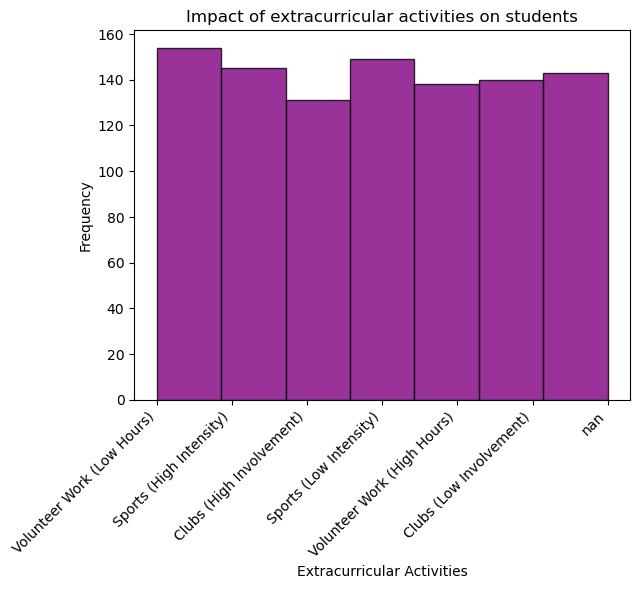

In [290]:
def histogram_plot():
    """
    Histogram plot function
    """
    activitiesimpact['Extracurricular_Activity']=activitiesimpact['Extracurricular_Activity'].astype(str)
    plt.hist(activitiesimpact['Extracurricular_Activity'], bins=7, color='purple', alpha=0.8, edgecolor ='black')
    plt.title("Impact of extracurricular activities on students")
    plt.xlabel("Extracurricular Activities")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.show()
    return

histogram_plot()

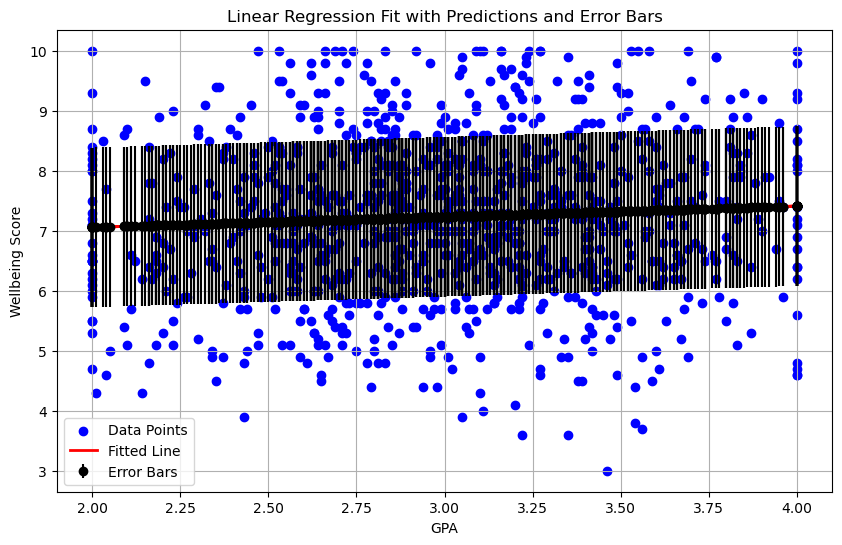

In [233]:
def fitting_prediction():
    """
    scatter plot function using line fitting
    """
    # Numerical data for regression
    columns = ['GPA', 'Wellbeing_Score']
    numerical_data = activitiesimpact[columns]
    
    #Independent (X) and dependent (y) variables
    X = numerical_data[['GPA']].values  # Reshape to 2D for sklearn
    y = numerical_data['Wellbeing_Score'].values
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predictions and residuals (errors)
    y_pred = model.predict(X)
    residuals = y - y_pred
    std_error = np.std(residuals)  # Standard error for error bars
    
    # Plot the scatter and regression line with error bars
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
    plt.errorbar(X, y_pred, yerr=std_error, fmt='o', color='black', label='Error Bars')
    plt.xlabel('GPA')
    plt.ylabel('Wellbeing Score')
    plt.title('Linear Regression Fit with Predictions and Error Bars')
    plt.legend()
    plt.grid()
    plt.show()

fitting_prediction()


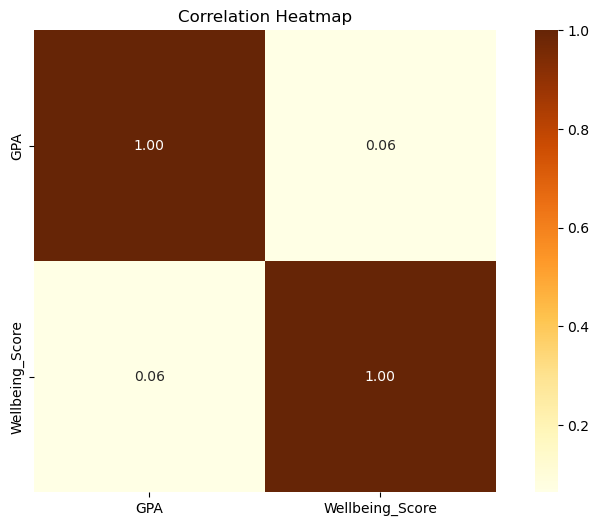

In [274]:
def heatmap_plot():
    """
    heatmap plot function
    """
    columns = ['Student_ID','Extracurricular_Activity','GPA','Wellbeing_Score']
    required_data= activitiesimpact[columns]
    new_column_names = ['Student_ID','Extracurricular_Activity','GPA','Wellbeing_Score']
    required_data.columns = new_column_names
    numerical_data = required_data[['GPA', 'Wellbeing_Score']]
    correlation_matrix = numerical_data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt=".2f", square=True)
    plt.title('Correlation Heatmap')
    plt.show()
    return

heatmap_plot()


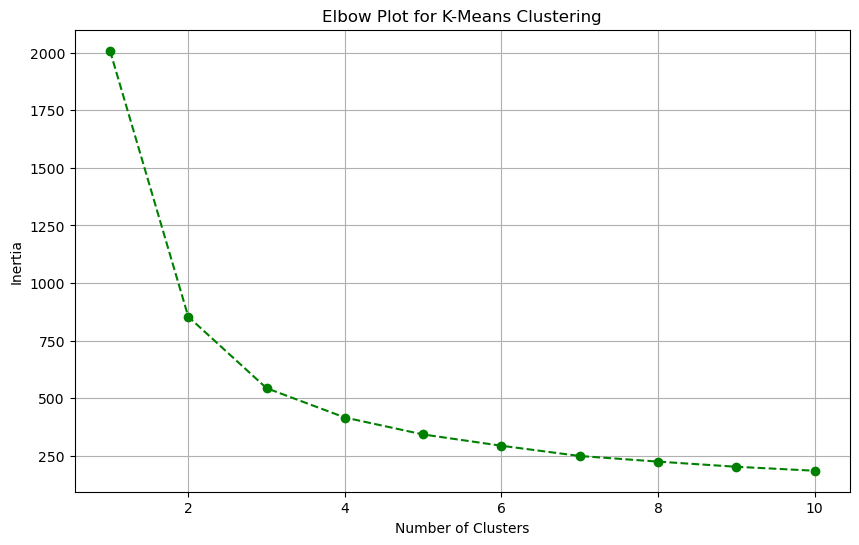

In [14]:
def elbow_plot():
    """
    elow plot function
    """
    
    numerical_data = activitiesimpact[['GPA', 'Wellbeing_Score']]
    inertia_values = []
    cluster_range = range(1, 11)  # Test cluster counts from 1 to 10
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(numerical_data)
        inertia_values.append(kmeans.inertia_)
    
    # Plot the elbow
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertia_values, marker='o', linestyle='--', color='g')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for K-Means Clustering')
    plt.grid()
    plt.show()

elbow_plot()